In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy import special
import math
%matplotlib inline

In [2]:
def K(x,s):
    return(np.exp(-(x/s)**2))/s/np.sqrt(np.pi)

In [3]:
def temporal(t):
    k1 = 2.
    sigma_1 = 30
    u1 = 80
    k2 = 1.8
    sigma_2 = 45
    u2 = 180
    kernal1 = (k1/np.sqrt(2*np.pi)/sigma_1)*np.exp(-(t-u1)**2/(2*sigma_1**2))
    kernal2 = (k2/np.sqrt(2*np.pi)/sigma_2)*np.exp(-(t-u2)**2/(2*sigma_2**2))
    return kernal1-kernal2

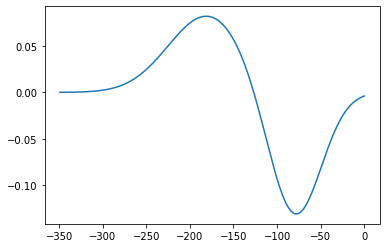

In [4]:
#Temporal kernal
tp = temporal(np.arange(0,350))
tp = tp/sum(tp)
plt.plot(np.arange(-349,1),-np.flip(tp))


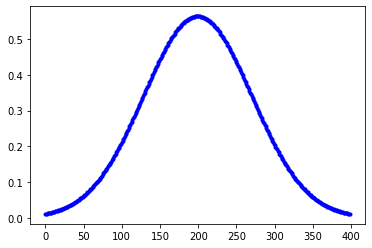

In [5]:
sigma_h = 1# RF size of horizontal cell
sigma_c = sigma_h*2/3# RF size of cone cell
gamma = 1/(sigma_c**2)
klen = 2*sigma_h# half of width of horizontal kernal
dx = 0.01*sigma_h
##Create spatial kernal
xx = np.arange(0,klen,dx)
khxs = K(xx,sigma_h)
KH = np.zeros(int(klen*2/dx)-1)
tmp = khxs[::-1]
KH[0:int(klen/dx)]= tmp[0:int(klen/dx)]
KH[int(klen/dx):2*int(klen/dx)]=khxs[1:int(klen/dx)]
plt.plot(KH,'b.')

In [6]:
#Width setting
xlen = 10*sigma_h #spatial extend of simulation
hw = 0.75*sigma_h#half bar width
tempx = np.arange(0,xlen,dx)

In [7]:
dt = 0.001
#alpha = 20
alpha = 80
beta = 2
#beta = 1
k = 500
g = 1/15
phi = 1.

g*k*phi/alpha/beta

0.20833333333333334

In [21]:
nstep = 2000#time step of simulation
speak = np.random.randn(nstep)
speak = (speak-np.mean(speak))/(max(speak)-min(speak))*xlen/2+xlen/2

In [22]:
v = 1.5*sigma_h
# pos_0 = 3*sigma_h#The center of the bar also where the bar start


y = np.zeros(int(xlen/dx)) # cone cell output
z = np.zeros(int(xlen/dx)) # horizontal cell output
ry = np.convolve(y,KH,'same')# feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)
rz = np.convolve(z,KH,'same')# feedback from horizontal cell (z convoluted with horitonatl cell receptive field KH)



rpeak = np.zeros(nstep)#Cone cell peak
gpeak = np.zeros(nstep)#Ganglion cell peak

stm = np.zeros([int(xlen/dx),nstep])#input
rsp = np.zeros([int(xlen/dx),nstep])#y output
zts = np.zeros([int(xlen/dx),nstep])#horizontal

for i in range(nstep):
    pos = speak[i]
    rs = special.erf((tempx-pos+hw)/sigma_c) - special.erf((tempx-pos-hw)/sigma_c)

    dyj =(-alpha*y+k*(rs-phi*rz))*dt
    dzj =(-beta*z+g*y)*dt
    y = (y+dyj)
    z = (z+dzj)

    ry = np.convolve(y,KH,'same')# feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)
    rz = np.convolve(z,KH,'same')# feedback from horizontal cell (z convoluted with horitonatl cell receptive field KH)
    
    maxpos = np.argmax(y)
    rpeak[i]= maxpos*dx
    stm[:,i] = rs
    rsp[:,i] = y
    zts[:,i] = z
    

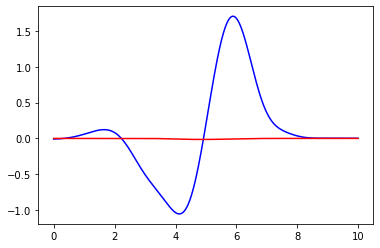

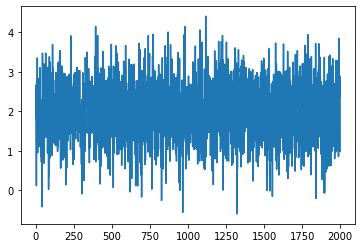

In [23]:
#####PLot numerical solution########
plt.plot(tempx,y,'b')#numerical solution
plt.plot(tempx,-z,'r')#numerical solution
# distance travelled
plt.figure()
plt.plot(speak)

In [78]:
#######Convolution with temporal kernal---tp
ganglion = np.zeros([int(xlen/dx),nstep-len(tp)+1])
for i in range(int(xlen/dx)):
    ganglion[i,:] = np.convolve(tp,rsp[i,:],'valid')

#####Get ganglion peak position
for i in range(nstep-len(tp)+1):
    maxpos = np.argmax(ganglion[:,i])
    gpeak[i+len(tp)-1]= maxpos*dx

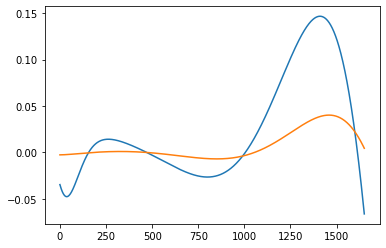

In [81]:
plt.plot(ganglion[800,:])
plt.plot(rsp[800,(len(tp)-1):])

351
404.17


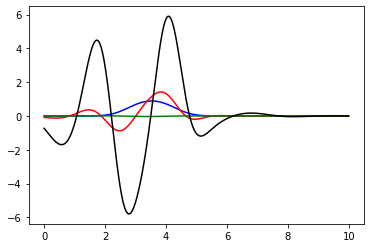

551
431.86


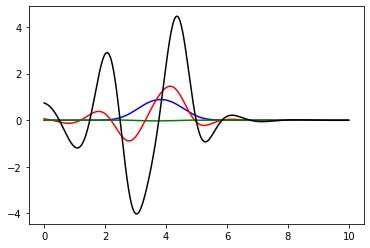

751
462.57


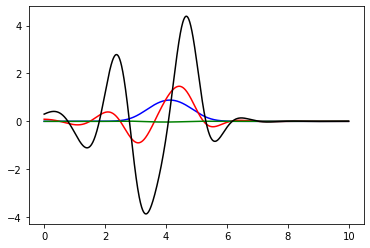

951
492.27


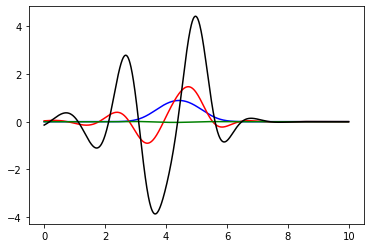

1151
521.97


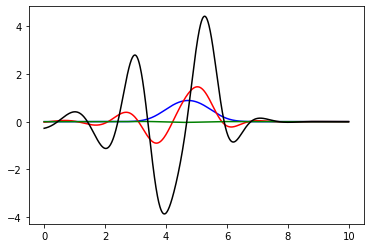

1351
551.67


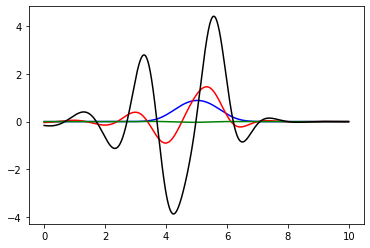

1551
581.37


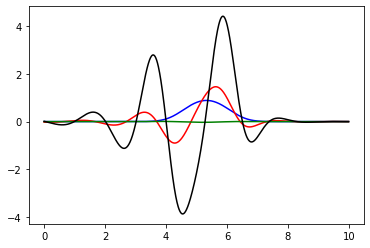

1751
611.07


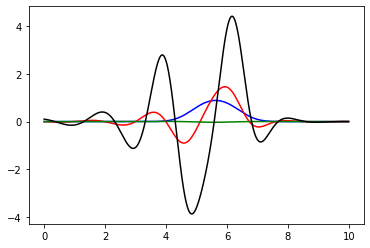

1951
640.77


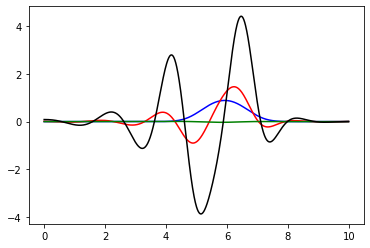

In [82]:
# snapshot at different time

for index in np.arange(len(tp)+1,nstep,200):
    print(index)
    plt.figure()
    #index=10 # large response; weak feedback
    plt.plot(tempx,stm[:,index]*0.5,'b')#stimulus
    plt.plot(tempx,rsp[:,index],'r')#y
    plt.plot(tempx,-zts[:,index],'g')#z
    plt.plot(tempx,ganglion[:,index-len(tp)+1],'k')#temporal kernal
    maxpos_r = rpeak[index]
    maxpos_ganglion = np.argmax(ganglion[:,index-len(tp)+1])
    print(maxpos_ganglion-maxpos_r)
    plt.show()


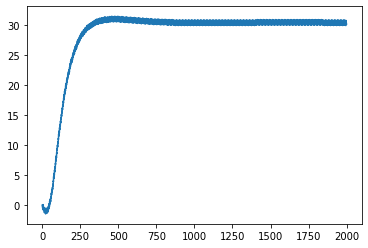

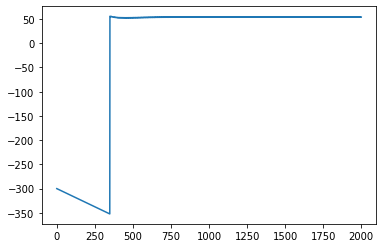

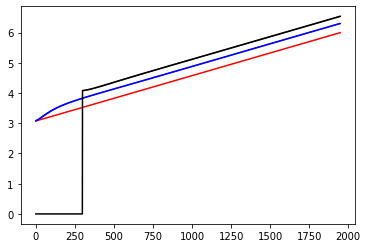

In [83]:
# difference between stimualtion and response peak
plt.plot((rpeak-speak)/dx)
plt.figure()
plt.plot((gpeak-speak)/dx)
#plt.ylim([0,15])


plt.figure()
plt.plot(speak[50:-1],'r')
plt.plot(rpeak[50:-1],'b')
plt.plot(gpeak[50:-1],'k')
#plt.xlim([350,450])